In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [39]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [79]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [91]:
date_list = session.query(Measurement.date).all()
max(date_list)

('2017-08-23')

In [ ]:
date_list = session.query(Measurement.date).all()
max(date_list)

# Exploratory Climate Analysis

In [47]:
# Design a query to retrieve the last 12 months of precipitation data
last_year = dt.datetime(2017, 8, 23) - timedelta(365)

prcp_lastyr = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).all()

prcp_df = pd.DataFrame(prcp_lastyr)

prcp_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


([], <a list of 0 Text xticklabel objects>)

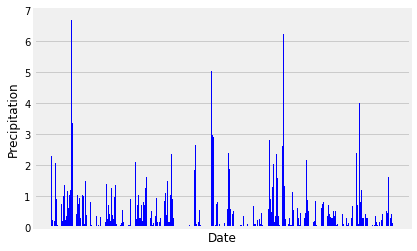

In [58]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(prcp_df.date, prcp_df.prcp, color='blue')
plt.ylabel('Precipitation')
plt.xlabel('Date')
plt.xticks([])

In [61]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.prcp.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [66]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.name).count()

9

In [82]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_rows = session.query(Station.station,func.count(Measurement.station)).\
    filter(Station.station == Measurement.station).\
    group_by(Station.station).\
    order_by(func.count(Measurement.station)).all()

station_rows

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [83]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Station.station, 
       func.min(Measurement.prcp), 
       func.max(Measurement.prcp), 
       func.avg(Measurement.prcp)
      ]
most_active = session.query(*sel).\
    filter(Station.station == Measurement.station).\
    filter(Station.station == 'USC00519281').all()
most_active

[('USC00519281', 0.0, 9.64, 0.21235209235209238)]

In [87]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date > last_year).\
    filter(Measurement.station == 'USC00519281').all()
df_temps = pd.DataFrame(temps)

df_temps.head()

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


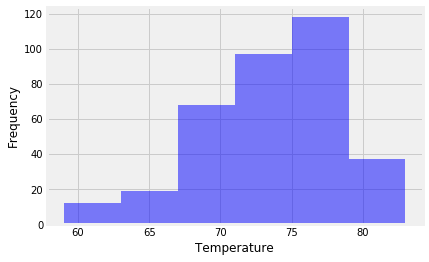

In [89]:
num_bins = 6
n, bins, patches = plt.hist(df_temps.tobs, num_bins, facecolor='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Temperatu')
plt.show()